# Questions to Answer with this Data:
1. What are the most important features that users expect in a drink shop mobile application?
2. What are the dealbreakers in using a drink shop mobile application?
3. How does the frequency of visiting a drink shop relate to the importance of different features in a mobile application?
4. How does the frequency of visiting a drink shop relate to the dealbreakers in a mobile application?
5. What is the relationship between the importance of features and the likelihood of using a drink shop mobile application?
6. What is the relationship between the dealbreakers in using an app and the likelihood of using a drink shop mobile application? 

## Other charts:
1. Frequency of visiting a drink shop as a pie chart
2. Mobile app usage as a pie chart
3. Distribution of top features
4. Distribution of dealbreakers
 

In [17]:
import pandas as pd
# read in xlsx file into a dataframe, first row is the header
df = pd.read_excel('survey1cleaned.xlsx')
# print the first 5 rows of the dataframe\
#print(df.iloc[0:5].to_markdown())


# create new dataframe that contains only the frequency column
dailyweekly = df[['frequency', 'features']]
dealbreakerbyfreq = df[['frequency', 'dealbreakers']]
# split column features into multiple columns by ; delimiter
# make column a 1 if the feature is present, 0 if not
# add new columns to dataframe
for feature in dailyweekly['features']:
    for f in feature.split(';'):
        dailyweekly[f] = dailyweekly['features'].str.contains(f).astype(int)
# drop the features column
dailyweekly.drop('features', axis=1, inplace=True)
dailyweekly.drop('', axis=1, inplace=True)

# do the same for dealbreakers
for dealbreaker in dealbreakerbyfreq['dealbreakers']:
    for d in dealbreaker.split(';'):
        dealbreakerbyfreq[d] = dealbreakerbyfreq['dealbreakers'].str.contains(d).astype(int)
dealbreakerbyfreq.drop('dealbreakers', axis=1, inplace=True)
dealbreakerbyfreq.head()

|    |   ID | frequency          | is_mobile_user   |   no_mobile_reason | features                                                                                                                                                                                                                   | dealbreakers                                                                                                                                                 | prototype                                                               |
|---:|-----:|:-------------------|:-----------------|-------------------:|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-------------------------------------------------------------------------------------------------------------------------------------------------------------|:----------------

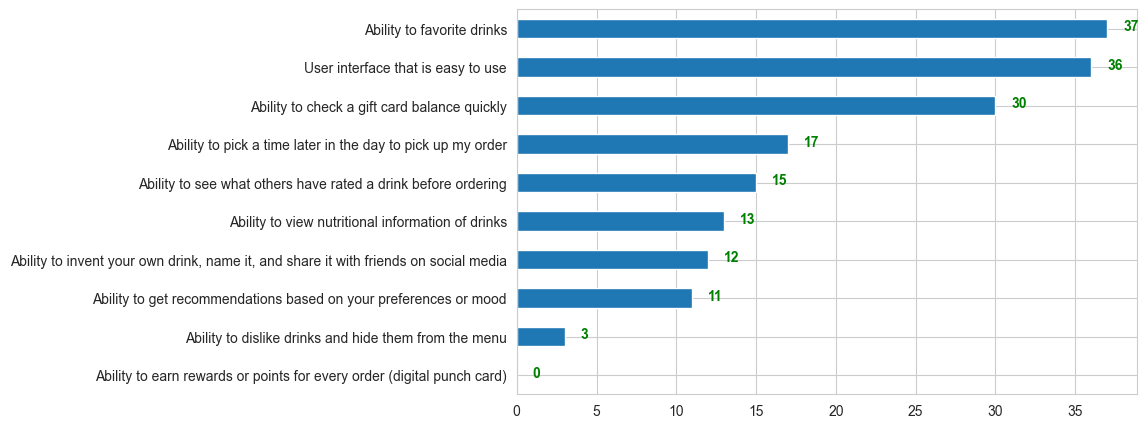

In [17]:
import matplotlib.pyplot as plt
import numpy as np
# graph the sum of each feature, ignore the frequency column and the unlabeled column
# make it horizontal and include the count value on the bar
dailyweekly.iloc[:,1:].sum().sort_values().plot(kind='barh', figsize=(8,5))
for i, v in enumerate(dailyweekly.iloc[:,1:].sum().sort_values()):
    plt.text(v + 1, i - .05 , str(v), color='green', fontweight='bold')
plt.show()

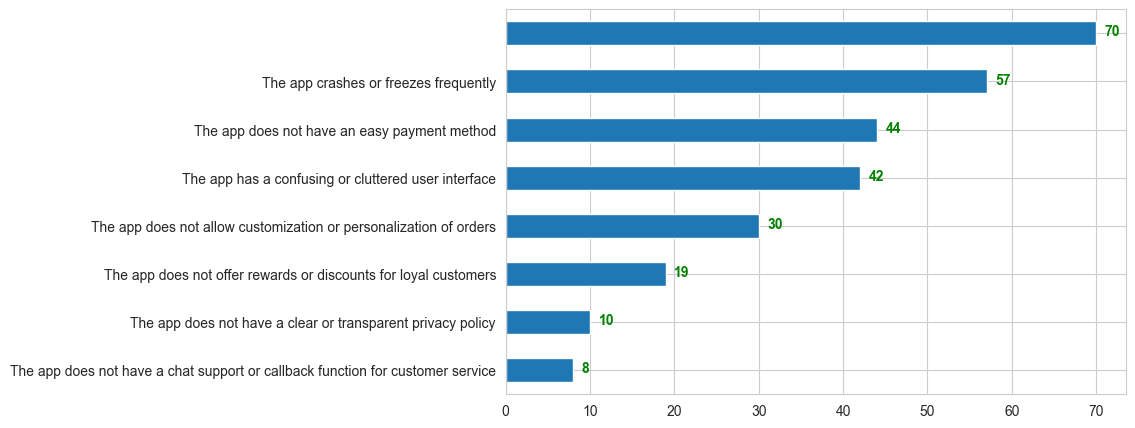

In [18]:
# graph the sum of each dealbreaker, ignore the frequency column and the unlabeled column
# make it horizontal and include the count value on the bar
dealbreakerbyfreq.iloc[:,1:].sum().sort_values().plot(kind='barh', figsize=(8,5))
for i, v in enumerate(dealbreakerbyfreq.iloc[:,1:].sum().sort_values()):
    plt.text(v + 1, i - .05 , str(v), color='green', fontweight='bold')
plt.show()


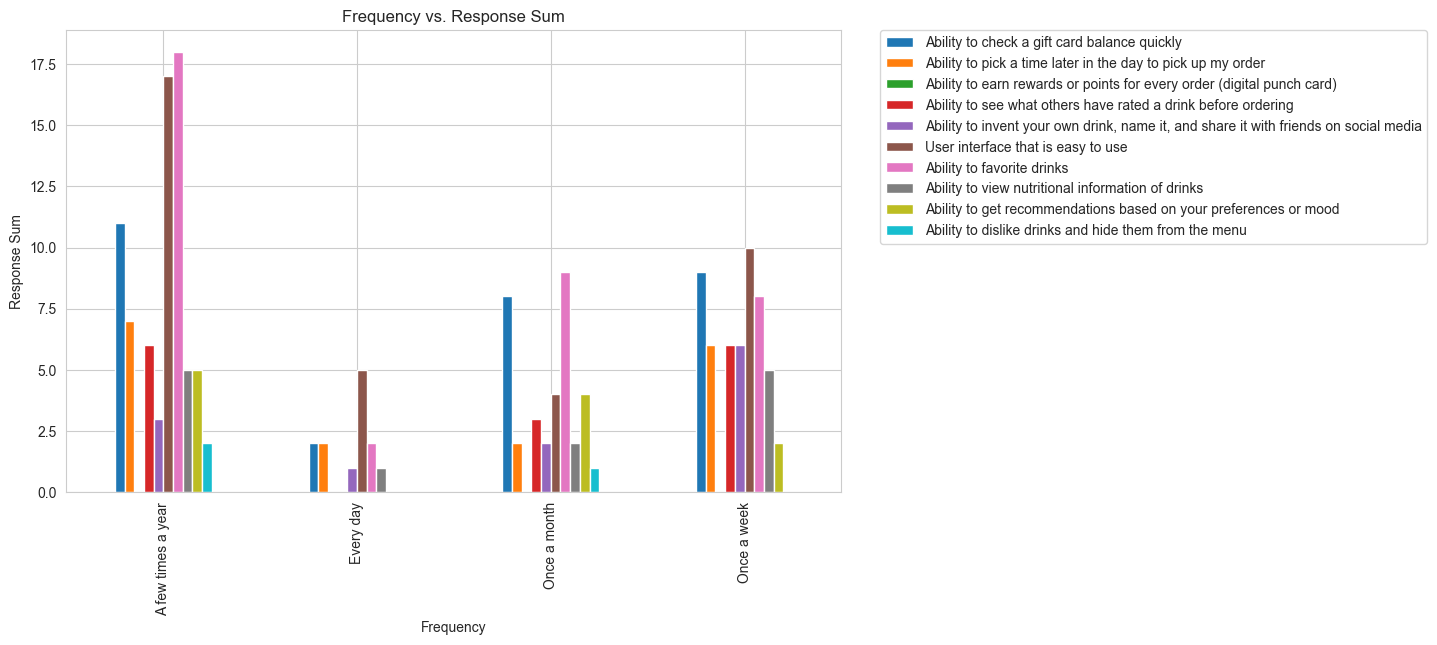

In [19]:
import seaborn as sns
# value count each feature column grouped by frequency
sum_data = dailyweekly.groupby('frequency').sum()
# make the graph horizontal
sns.set_style('whitegrid')
sum_data.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Frequency vs. Response Sum')
plt.xlabel('Frequency')
plt.ylabel('Response Sum')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()



In [20]:
# interactively plot the features grouped by frequency
import plotly.express as px
fig = px.bar(dailyweekly, x="frequency", y=dailyweekly.columns[1:], barmode="group")
fig.update_layout(xaxis_title="Frequency", yaxis_title="Count")
fig.update_layout(title_text='Frequency of Soda Shack Visits and Requested Features')
fig.update_layout(legend_title_text='Features')
fig.show()

In [28]:
# interactively plot the features
import plotly.express as px
dailyweekly = featurebyfreq[(featurebyfreq['frequency'] == 'Every day') | (featurebyfreq['frequency'] == 'Once a week')]
# graph totals of each feature
fig = px.bar(dailyweekly, x="frequency", y=dailyweekly.columns[1:], barmode="group")
fig.update_layout(xaxis_title="Frequency", yaxis_title="Count")
fig.update_layout(title_text='Frequency of Soda Shack Visits and Requested Features')
fig.update_layout(legend_title_text='Features')
fig.show()
